In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [22]:
End = '2019-05-05'

In [23]:
End = pd.to_datetime(End)
Start2 = (End - timedelta(days=180))
df2 = df.loc[Start2:End]
df2.index = df2.index.map(mdates.date2num)

In [24]:
Min_pozycja = df2['Low'].argmin()
Max_pozycja = df2['High'].argmax()

Max_idx = df2.iloc[Min_pozycja].name
Ax = df2.iloc[Max_pozycja].name
Ay = df2['High'].loc[Ax]
A = [Ax, Ay]

df2a = df2[:Max_idx]
while len(df2a)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df2a.index, y=df2a['High'])
    df2a = df2a.loc[df2a['High'] > slope * df2a.index + intercept]
    
Bx = df2a.index.max()
By = df2a['High'].loc[Bx]
B = [Bx, By]
    
a = (Ay-By)/(Ax-Bx)
b = By - a*Bx
    
Cx = df2a.index.max() +10
Cy = a*Cx +b
C = [Cx, Cy]
    
X_mid = [Ax, Cx]
Y_mid = [Ay, Cy]
print(f'Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Max_pozycja}')
print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')

Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: 1
Trend spadkowy. Punkt A : [17842.0, 6552.160156], punkt C: [17888.0, 2639.067098111147]


In [25]:
A[0]+1

17843.0

In [26]:
for i in range()

SyntaxError: invalid syntax (<ipython-input-26-f8d1be0104ca>, line 1)

In [27]:
df21 = df2[:Max_idx]
df21['Pozycja na LT'] = df21.index * a + b
df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
good = df21['check'][df21['check']<=0].count()
sum = len(df21['check'])

if good == sum:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')
else:
    Max_pozycja = df21['High'].argmax()+1

    Max_idx = df2.iloc[Min_pozycja].name
    Ax = df21.iloc[Max_pozycja].name
    Ay = df21['High'].loc[Ax]
    A = [Ax, Ay]

    df21a = df21
    while len(df21a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df21a.index, y=df21a['High'])
        df21a = df21a.loc[df21a['High'] > slope * df21a.index + intercept]

    Bx = df21a.index.max()
    By = df21a['High'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx

    Cx = df2a.index.max() +10
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_mid = [Ax, Cx]
    Y_mid = [Ay, Cy]
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w {sum-good} miejscach. Pozycja początkowa: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')

Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w 9 miejscach. Pozycja początkowa: 2
Trend spadkowy. Punkt A : [17843.0, 6536.919922], punkt C: [17888.0, 2619.1165248570032]


In [28]:
df22 = df2[A[0]:Max_idx]
df22['Pozycja na LT'] = df22.index * a + b
df22['check']= round(df22['High'] - df22['Pozycja na LT'],0)

good = df22['check'][df22['check']<=0].count()
sum = len(df22['check'])

if good == sum:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')
else:
    Max_pozycja = df22['High'].argmax()+1

    Max_idx = df2.iloc[Min_pozycja].name
    Ax = df22.iloc[Max_pozycja].name
    Ay = df22['High'].loc[Ax]
    A = [Ax, Ay]

    df22a = df22
    while len(df22a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df22a.index, y=df22a['High'])
        df22a = df22a.loc[df22a['High'] > slope * df22a.index + intercept]

    Bx = df22a.index.max()
    By = df22a['High'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx

    Cx = df2a.index.max() +10
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_mid = [Ax, Cx]
    Y_mid = [Ay, Cy]
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w {sum-good} miejscach. Pozycja początkowa: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')

Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w 7 miejscach. Pozycja początkowa: 1
Trend spadkowy. Punkt A : [17844.0, 6456.459961], punkt C: [17888.0, 2617.174661117606]


In [39]:
b

1780076.1049169654

In [38]:
a

-99.37276906896551

In [31]:
df22

,Open,High,Low,Close,Volume,Pozycja na LT,check
17843.0,6522.270020,6536.919922,6438.529785,6453.720215,4.665260e+09,6536.919922,0.0
17844.0,6442.600098,6456.459961,6373.370117,6385.620117,4.346820e+09,6449.857624,7.0
17845.0,6386.129883,6437.279785,6385.310059,6409.220215,3.705320e+09,6362.795327,74.0
17846.0,6413.629883,6423.250000,6350.169922,6411.270020,3.939060e+09,6275.733029,148.0
17847.0,6411.759766,6434.209961,6360.470215,6371.270020,4.295770e+09,6188.670731,246.0
17848.0,6373.189941,6395.270020,6342.669922,6359.490234,4.503800e+09,6101.608433,294.0
17849.0,6351.240234,6371.549805,5544.089844,5738.350098,7.398940e+09,6014.546136,357.0
17850.0,5736.149902,5774.819824,5358.379883,5648.029785,7.032140e+09,5927.483838,-153.0
17851.0,5645.319824,5657.020020,5498.939941,5575.549805,5.279320e+09,5840.421540,-183.0
17852.0,5578.580078,5578.580078,5519.560059,5554.330078,4.303150e+09,5753.359243,-175.0


In [32]:
df23 = df2[A[0]:Max_idx]
df23['Pozycja na LT'] = df23.index * a + b
df23['check']= round(df23['High'] - df23['Pozycja na LT'],0)

good = df23['check'][df23['check']<=0].count()
sum = len(df23['check'])

if good == sum:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')
else:
    Max_pozycja = df23['High'].argmax()+1

    Max_idx = df2.iloc[Min_pozycja].name
    Ax = df23.iloc[Max_pozycja].name
    Ay = df23['High'].loc[Ax]
    A = [Ax, Ay]

    df23a = df23
    while len(df23a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df23a.index, y=df23a['High'])
        df23a = df23a.loc[df23a['High'] > slope * df23a.index + intercept]

    Bx = df23a.index.max()
    By = df23a['High'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx

    Cx = df2a.index.max() +10
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_mid = [Ax, Cx]
    Y_mid = [Ay, Cy]
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w {sum-good} miejscach. Pozycja początkowa: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')

Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w 6 miejscach. Pozycja początkowa: 1
Trend spadkowy. Punkt A : [17845.0, 6437.279785], punkt C: [17888.0, 2596.5454768484924]


In [33]:
df24 = df2[A[0]:Max_idx]
df24['Pozycja na LT'] = df24.index * a + b
df24['check']= round(df24['High'] - df24['Pozycja na LT'],0)

good = df24['check'][df24['check']<=0].count()
sum = len(df24['check'])

if good == sum:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')
else:
    Max_pozycja = df24['High'].argmax()+1

    Max_idx = df2.iloc[Min_pozycja].name
    Ax = df24.iloc[Max_pozycja].name
    Ay = df24['High'].loc[Ax]
    A = [Ax, Ay]

    df24a = df24
    while len(df24a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df24a.index, y=df24a['High'])
        df24a = df24a.loc[df24a['High'] > slope * df24a.index + intercept]

    Bx = df24a.index.max()
    By = df24a['High'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx

    Cx = df2a.index.max() +10
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_mid = [Ax, Cx]
    Y_mid = [Ay, Cy]
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w {sum-good} miejscach. Pozycja początkowa: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')

Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w 4 miejscach. Pozycja początkowa: 1
Trend spadkowy. Punkt A : [17846.0, 6423.25], punkt C: [17888.0, 2573.017471374944]


In [34]:
df25 = df2[A[0]:Max_idx]
df25['Pozycja na LT'] = df25.index * a + b
df25['check']= round(df25['High'] - df25['Pozycja na LT'],0)

good = df25['check'][df25['check']<=0].count()
sum = len(df25['check'])

if good == sum:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')
else:
    Max_pozycja = df25['High'].argmax()+1

    Max_idx = df2.iloc[Min_pozycja].name
    Ax = df25.iloc[Max_pozycja].name
    Ay = df25['High'].loc[Ax]
    A = [Ax, Ay]

    df25a = df25
    while len(df25a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df25a.index, y=df25a['High'])
        df25a = df25a.loc[df25a['High'] > slope * df25a.index + intercept]

    Bx = df25a.index.max()
    By = df25a['High'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx

    Cx = df2a.index.max() +10
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_mid = [Ax, Cx]
    Y_mid = [Ay, Cy]
    
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w {sum-good} miejscach. Pozycja początkowa: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')

Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w 3 miejscach. Pozycja początkowa: 2
Trend spadkowy. Punkt A : [17848.0, 6395.27002], punkt C: [17888.0, 2521.229329333175]


In [35]:
df26 = df2[A[0]:Max_idx]
df26['Pozycja na LT'] = df26.index * a + b
df26['check']= round(df26['High'] - df26['Pozycja na LT'],0)

good = df26['check'][df26['check']<=0].count()
sum = len(df26['check'])

if good == sum:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')
else:
    Max_pozycja = df26['High'].argmax()+1

    Max_idx = df2.iloc[Min_pozycja].name
    Ax = df26.iloc[Max_pozycja].name
    Ay = df26['High'].loc[Ax]
    A = [Ax, Ay]

    df26a = df26
    while len(df26a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df26a.index, y=df26a['High'])
        df26a = df26a.loc[df26a['High'] > slope * df26a.index + intercept]

    Bx = df26a.index.max()
    By = df26a['High'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx

    Cx = df2a.index.max() +10
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_mid = [Ax, Cx]
    Y_mid = [Ay, Cy]
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w {sum-good} miejscach. Pozycja początkowa: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')

Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w 1 miejscach. Pozycja początkowa: 1
Trend spadkowy. Punkt A : [17849.0, 6371.549805], punkt C: [17888.0, 2496.0118113101926]


In [36]:
df27 = df2[A[0]:Max_idx]
df27['Pozycja na LT'] = df27.index * a + b
df27['check']= round(df27['High'] - df27['Pozycja na LT'],0)

good = df27['check'][df27['check']<=0].count()
sum = len(df27['check'])

if good == sum:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')
else:
    Max_pozycja = df27['High'].argmax()+1

    Max_idx = df2.iloc[Min_pozycja].name
    Ax = df27.iloc[Max_pozycja].name
    Ay = df27['High'].loc[Ax]
    A = [Ax, Ay]

    df27a = df27
    while len(df27a)>2:
        slope, intercept, r_value, p_value, std_err = linregress(x=df27a.index, y=df27a['High'])
        df27a = df27a.loc[df27a['High'] > slope * df27a.index + intercept]

    Bx = df27a.index.max()
    By = df27a['High'].loc[Bx]
    B = [Bx, By]

    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx

    Cx = df2a.index.max() +10
    Cy = a*Cx +b
    C = [Cx, Cy]

    X_mid = [Ax, Cx]
    Y_mid = [Ay, Cy]
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Nastąpiło przecięcie cen w {sum-good} miejscach. Pozycja początkowa: {Max_pozycja}')
    print(f'Trend spadkowy. Punkt A : {A}, punkt C: {C}')

Najwyższy punkt został osiągnięty jako pierwszy i nie przecina ceny. Jego pozycja to: 1
Trend spadkowy. Punkt A : [17849.0, 6371.549805], punkt C: [17888.0, 2496.0118113101926]


In [37]:
df27

,Open,High,Low,Close,Volume,Pozycja na LT,check
17849.0,6351.240234,6371.549805,5544.089844,5738.350098,7.398940e+09,6371.549805,0.0
17850.0,5736.149902,5774.819824,5358.379883,5648.029785,7.032140e+09,6272.177036,-497.0
17851.0,5645.319824,5657.020020,5498.939941,5575.549805,5.279320e+09,6172.804267,-516.0
17852.0,5578.580078,5578.580078,5519.560059,5554.330078,4.303150e+09,6073.431498,-495.0
17853.0,5559.740234,5653.609863,5559.740234,5623.540039,4.159680e+09,5974.058729,-320.0
17854.0,5620.779785,5620.779785,4842.910156,4871.490234,7.039560e+09,5874.685960,-254.0
17855.0,4863.930176,4951.609863,4272.109863,4451.870117,8.428290e+09,5775.313191,-824.0
17856.0,4465.540039,4675.729980,4343.979980,4602.169922,6.120120e+09,5675.940422,-1000.0
17857.0,4611.569824,4629.640137,4365.640137,4365.939941,4.569370e+09,5576.567652,-947.0
17858.0,4360.700195,4396.419922,4195.680176,4347.109863,4.871490e+09,5477.194883,-1081.0


In [19]:
df2.reset_index(inplace = True)

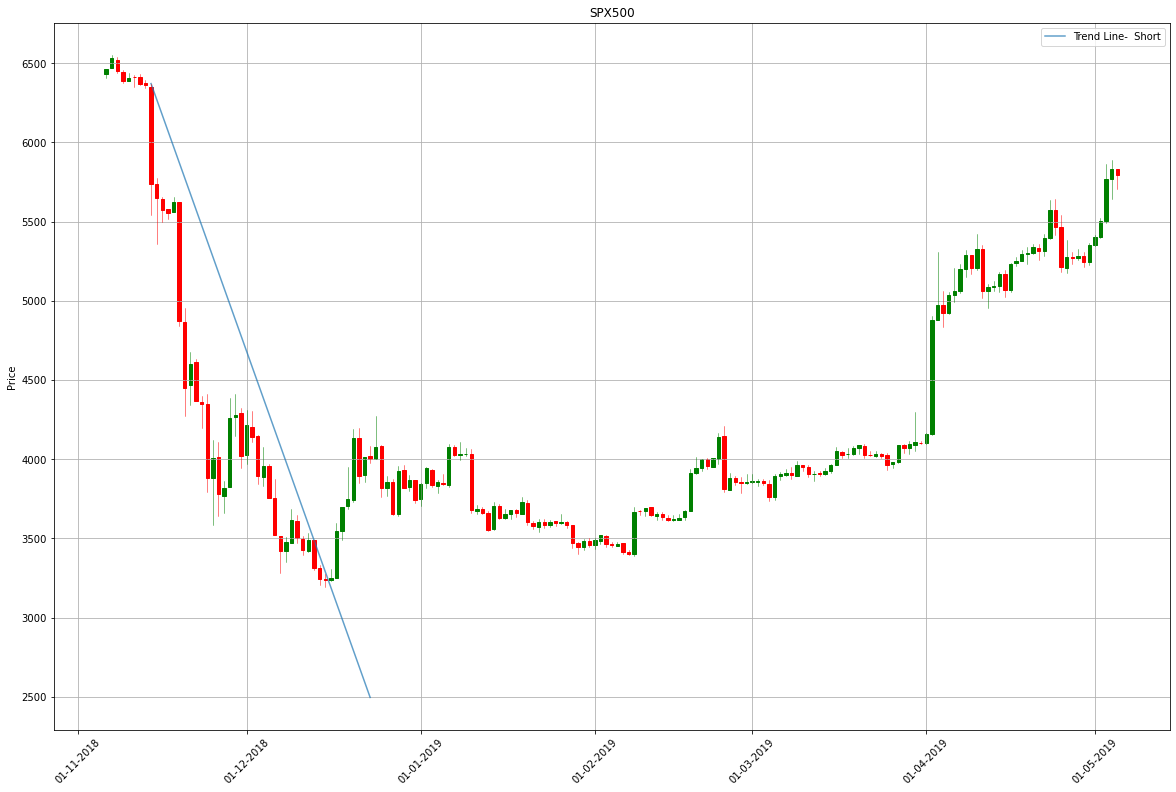

In [279]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X_mid, Y_mid, label='Trend Line-  Short', alpha = 0.7)



plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df2.values, width=0.6, colorup='g', colordown='r')
plt.show()